# Zadanie 5
Analiza zbioru danych Titanic:
o Wczytaj zbiór danych Titanic zawierający informacje o pasażerach statku.
o Przeprowadź analizę eksploracyjną danych, identyfikując istotne cechy dla przewidywania przeżycia.
o Przygotuj dane do budowy modeli klasyfikacji, usuwając brakujące wartości i kodując zmienne kategoryczne.
o Zbuduj modele klasyfikacji, takie jak regresja logistyczna lub drzewo decyzyjne, do
przewidywania przeżycia pasażerów.
o Oceń jakość klasyfikatorów za pomocą metryk oceny, takich jak dokładność i
krzywa ROC-AUC.
o Zinterpretuj wyniki i zidentyfikuj czynniki mające największy wpływ na przeżycie.

In [27]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [28]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X

C:\Users\jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


In [30]:
# Zamiany cechy płci z tekstowej female, male na binarną 1 - male 0 - female
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",0,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,"Zabour, Miss. Thamine",0,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,"Zakarian, Mr. Mapriededer",1,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,"Zakarian, Mr. Ortin",1,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [31]:
# Usuwamy kolumny które moim zdaniem nie zawierają informacji a będą one trudne do uzupełnienia ponieważ zawierają wiele nieprawidłowości
X.drop(['boat', 'body', 'cabin', 'name', 'embarked', 'ticket', 'home.dest', 'pclass', 'name', ], axis=1, inplace=True)

In [32]:
# Wybieramy cechy by sprawdzić korelację
matrix = X[['age', 'sibsp', 'parch', 'fare', 'sex']].corr()
print("Macierz Korelacji:")
print(matrix)

Macierz Korelacji:
            age     sibsp     parch      fare       sex
age    1.000000 -0.243699 -0.150917  0.178739  0.063646
sibsp -0.243699  1.000000  0.373587  0.160238 -0.109609
parch -0.150917  0.373587  1.000000  0.221539 -0.213125
fare   0.178739  0.160238  0.221539  1.000000 -0.185523
sex    0.063646 -0.109609 -0.213125 -0.185523  1.000000


In [33]:
X

,sex,age,sibsp,parch,fare
0,0,29.0000,0.0,0.0,211.3375
1,1,0.9167,1.0,2.0,151.5500
2,0,2.0000,1.0,2.0,151.5500
3,1,30.0000,1.0,2.0,151.5500
4,0,25.0000,1.0,2.0,151.5500
...,...,...,...,...,...
1304,0,14.5000,1.0,0.0,14.4542
1305,0,NaN,1.0,0.0,14.4542
1306,1,26.5000,0.0,0.0,7.2250
1307,1,27.0000,0.0,0.0,7.2250


In [34]:
# Podział na zestawy treningowe i testowe
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [39]:
# Budowa modelu drzewa decyzyjnego
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu SVM:", accuracy)

Dokładność modelu SVM: 0.7519083969465649


In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
def specificity_score(y_true, y_pred):
 tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
 specificity = tn / (tn + fp)
 return specificity
# Obliczenie specyficzności
specificity = specificity_score(y_test, y_pred)
print("Specyficzność:", specificity)

Specyficzność: 0.8472222222222222


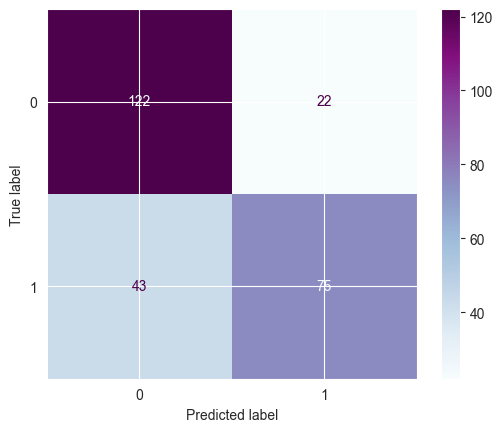

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='BuPu')
plt.show()

In [43]:
# Obliczenie precyzji
precision = precision_score(y_test, y_pred, average='micro')
print("Precyzja modelu: {:.2f}%".format(precision * 100))

Precyzja modelu: 75.19%
